## Imporved version
#### Họ và tên: Nguyễn Mạnh Hùng

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<b> Hàm đọc ảnh </b>
<ul>
  <li>Input: đường dẫn của ảnh</li>
  <li>Output: ảnh được lưu trữ ở dạng numpy</li>
</ul>

In [2]:
def ReadImage(path):
    image = Image.open(path)
    result = np.array(image, dtype = np.uint8)
    return result

<b>Hàm hiển thị ảnh</b></br>
Hàm dùng để hiển thị kết quả hình ảnh.
<ul>
  <li>Input: tham số ảnh ở dạng mảng numpy</li>
  <li>Output: hiển thị ảnh ở dạng kích thước gốc cùng với tiêu đề chứa kích thước ảnh</li>
</ul>

In [3]:
def ShowImage(img, gray_flag = False):
    plt.title(f"image size{img.shape}")
    plt.axis('off')
    if gray_flag:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)

<b>Hàm lưu ảnh</b></br>
Lưu lại kết quả hình ảnh sau khi thực hiện 1 tác vụ nào đó.</br>
Hàm bao gồm:
<ul>
  <li>Input: tham số lưu ảnh kết quả ở kiểu dữ liệu mảng numpy unint8 và tên chức năng đã thực hiện</li>
  <li>Output: file lưu ảnh tương ứng với định dạng jpg, với tên tương ứng</li>
</ul>

In [4]:
def SaveImage(img_arr, format, name):
    image = Image.fromarray(img_arr)
    result = f"{name}_{format}.jpg"
    image.save(result)

<b>Hàm chuyển đổi ảnh màu thành ảnh xám</b></br>
Hàm chuyển đổi thủ công từ ảnh màu về ảnh xám
<ul>
  <li>Input: tham số ảnh ở dạng mảng numpy</li>
  <li>Output: ảnh mức xám ở dạng mảng numpy</li>
</ul>

In [5]:
# chuyển đổi từ RGB về grayscale
def RGB2Gray(image):
    image = image[...,::-1].copy()
    # tách 3 kênh màu của ảnh
    red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
    gray = 0.2989*red + 0.5870*green + 0.1140*blue
    return gray.astype(np.uint8) # chuyển đổi định dạng của ảnh về kiểu dữ liệu uint8 (giá trị pixel 0-255)

<b>Hàm thay đổi độ sáng của ảnh</b></br>
Hàm tăng/giảm độ sáng của ảnh
<ul>
  <li>Input: tham số ảnh ở dạng mảng numpy, giá trị thay đổi độ sáng</li>
  <li>Output: ảnh đã được thay đổi độ sáng ở dạng mảng numpy</li>
</ul>

In [6]:
def Brightness(image, C):
    result = image + C
    # giá trị trong ma trận cộng với C mà > 255 thì sẽ được gán thành 255
    # còn < 0 thì sẽ được gán là 0
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

<b>Hàm thay đổi độ tương phản của ảnh</b></br>
Hàm tăng/giảm độ tương phản của ảnh
<ul>
  <li>Input: tham số ảnh ở dạng mảng numpy, giá trị thay đổi tương phản</li>
  <li>Output: ảnh đã được thay đổi độ tương phản ở dạng mảng numpy</li>
</ul>

In [7]:
def Contrast(image, C):
    result = image * C
    # giá trị trong ma trận cộng với C mà > 255 thì sẽ được gán thành 255
    # còn < 0 thì sẽ được gán là 0
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

<b>Hàm căt ảnh theo hình tròn</b></br>
Thực hiện việc cắt nội dung ảnh theo khung là hình tròn
<ul>
  <li>Input: tham số ảnh ở dạng mảng numpy</li>
  <li>Output: ảnh đã được cắt ghép theo khung hình tròn</li>
</ul>

In [8]:
def CircleCrop(image):
    width, height = image.shape[0], image.shape[1]

    R = height/2 if width > height else width/2 # bán kính khung hình tròn
    pic = image.copy()
    
    for a in range(width):
        for b in range(height):
            if (a - width/2)*(a - width/2) + (b - height/2)*(b - height/2) > R*R:
                pic[a][b] = 0 # điểm ảnh màu đen
    return pic.astype(np.uint8)

<b>Hàm chuyển hình ảnh sang sepia</b></br>
Thực hiện đổi ảnh màu thành sepia
<ul>
  <li>Input: tham số ảnh màu ở dạng mảng numpy</li>
  <li>Output: ảnh ở dạng sepia </li>
</ul>

In [9]:
def RGB2Sep(image):
    img = image.copy()
    # Tạo ma trận Sepia
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    # Vì ảnh được stack theo cột nên ta cần chuyển vị ma trận sepia để phù hợp cho phép nhân ma trận
    img = img.dot(sepia_matrix.T)
    # gán các ma trận vượt ngưỡng = 255
    img[img > 255] = 255
    return img.astype(np.uint8)

<b>Hàm lật ảnh dọc</b></br>
Thực hiện lật ảnh theo phương thẳng đứng
<ul>
  <li>Input: tham số ảnh màu ở dạng mảng numpy</li>
  <li>Output: ảnh đã được lấy đối xứng theo phương thẳng đứng so với ảnh gốc </li>
</ul>

In [10]:
def flipVertical(image):
    img = image.copy()
    h = img.shape[1]
    
    for i in range(h // 2):
        col = img[:, i, :].copy()
        img[:, i, :] = img[:, h - i - 1, :]
        img[:, h - i - 1, :] = col

    return img.astype(np.uint8)

<b>Hàm lật ảnh ngang</b></br>
Thực hiện lật ảnh theo phương ngang
<ul>
  <li>Input: tham số ảnh màu ở dạng mảng numpy</li>
  <li>Output: ảnh đã được lấy đối xứng theo phương ngang so với ảnh gốc </li>
</ul>

In [11]:
def flipHorizontal(image):
    img = image.copy()
    w = img.shape[0]
    
    for i in range(w // 2):
        row = img[i, :, :].copy()
        img[i, :, :] = img[w - i - 1, :, :]
        img[w - i - 1, :, :] = row

    return img.astype(np.uint8)

<b>Hàm làm mờ ảnh</b></br>
Thực hiện làm mờ ảnh theo thuật toán tích chập với mặt nạ Gauss
<ul>
  <li>Input: tham số ảnh màu ở dạng mảng numpy</li>
  <li>Output: ảnh đã được làm mờ</li>
</ul>

In [12]:
def gaussian_filter(k=5): # return gaussian mask matrix
    sigma = 1.5
    center = k // 2
    x, y = np.mgrid[0:k, 0:k] # tạo mảng 2D có giá trị mỗi ô 0->(k-1)
    g = (1/(2*np.pi*(sigma**2)))*np.exp(-((x - center)**2 + (y - center)**2) / (2 * sigma**2))
    return g / g.sum()

In [13]:
def convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # tính toán vị trí để thêm dãy số 0 ở ngoài rìa cho phép tích chập
    pad_height = (kernel_height - 1) // 2
    pad_width = (kernel_width - 1) // 2

    # thêm các số 0 ở các rìa ảnh, constant default nghĩa là giá trị 0
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    result = np.zeros_like(image)

    # thực hiện phép toán tích chập
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return result

In [14]:
def BlurImage(image):
    kernel = gaussian_filter()
    blurred = np.zeros_like(image)
    for i in range(3):
        blurred[:,:,i] = convolution(image[:,:,i], kernel)
    return blurred.astype(np.uint8)

<b>Hàm làm xén ảnh trung tâm</b></br>
Thực hiện xén ảnh theo kích thước với điểm trung tâm ảnh làm gốc
<ul>
  <li>Input: tham số ảnh màu ở dạng mảng numpy</li>
  <li>Output: ảnh đã được cắt xén và chỉ hiển thị nội ở trung tâm của ảnh gốc</li>
</ul>

In [15]:
def CropCenter(image):
    image_height, image_width, _ = image.shape

    # trung tâm
    c_height = (image_height - 1) // 2
    c_width = (image_width - 1) // 2
    dist_row = c_height // 2
    dist_col = c_width // 2

    # xén hình
    result = image[dist_row:c_height+dist_row+1, dist_col:c_width+dist_col+1,:]

    return result.astype(np.uint8)

<b>Hàm làm làm sắc nét ảnh</b></br>
Làm sắc nét bằng việc làm mờ ảnh đi sau đó thực hiện phép cộng giữa ảnh gốc và lượng chênh lệch giữa ảnh gốc và mờ nhằm loại bỏ các điểm nhiễu.
<ul>
  <li>Input: tham số ảnh màu ở dạng mảng numpy</li>
  <li>Output: ảnh đã được làm sắc nét</li>
</ul>

In [16]:
def Sharpen(image, amount=1):
    blurred = BlurImage(image)
    sharpened = image + amount * (image - blurred)
    return sharpened

<b> Hàm main -- Nơi thực hiện toàn bộ các tính năng xử lý ảnh theo yêu cầu và cho phép người dùng nhập tên file ảnh vào.

In [17]:
def flip_handler():
   print("1. Phương ngang")
   print("2. Phương dọc")
   solution = int(input("Chọn phương để lật ảnh: "))
   while solution != 1 and solution != 2:
      solution = int(input("Sai định dạng, vui lòng nhập lại: "))
   return solution

In [18]:
def mode_handler():
  mod = int(input("Chọn (1. Ảnh xám; 2. Ảnh sepia): "))
  while mod != 1 and mod != 2:
    mod = int(input("Sai định dạng, vui lòng nhập lại: "))
  return mod

In [19]:
def resolution():
    mod = int(input("Chọn (1. Làm mờ ảnh; 2. Làm sắc nét ảnh): "))
    while mod != 1 and mod != 2:
        mod = int(input("Sai định dạng, vui lòng nhập lại: "))
    return mod

In [20]:
def main():
    path = input("Nhập tên ảnh muốn xử lý: ")
    img = ReadImage(path)
    variable = path.split('.')
    print("Các tác vụ xử lý ảnh: ")
    print("1. Thay đổi độ sáng")
    print("2. Thay đổi độ tương phản")
    print("3. Lật ảnh ngang dọc")
    print("4. Chuyển đổi ảnh màu thành ảnh xám/sepia")
    print("5. Làm mờ/sắc nét ảnh")
    print("6. Cắt ảnh theo kích thước trung tâm")
    print("7. Cắt ảnh theo hình tròn")
    print("0. Thực hiện tất cả các chức năng")
    choice = int(input("Lựa chọn của bạn là: "))
    print()
    if choice > 7 or choice < 0:
        print("Sai định dạng, vui lòng nhập lại chương trình")

    elif choice == 1: # 1. độ sáng (1 điểm)

        val = int(input("Nhập giá trị hiệu chỉnh độ sáng: "))
        result = Brightness(img, val)
        ShowImage(result)
        print("Saving...")
        SaveImage(result, "brightness", variable[0])

    elif choice == 2: # 2. độ tương phản (1 điểm)

        val = float(input("Nhập giá trị hiệu chỉnh độ tương phản: "))
        result = Contrast(img, val)
        ShowImage(result)
        print("Saving...")
        SaveImage(result, "contrast", variable[0])

    elif choice == 3: # 3. lật ảnh ngang dọc (1 điểm)

        solution = flip_handler()
        if solution == 1:
            result = flipHorizontal(img)
            ShowImage(result)
            print("Saving...")
            SaveImage(result, "horizon", variable[0])
        else:
            result = flipVertical(img)
            ShowImage(result)
            print("Saving...")
            SaveImage(result, "vertical", variable[0])
        
    elif choice == 4: # 4. chuyển ảnh thành ảnh xám/sepia (2 điểm)

        solution = mode_handler()
        if solution == 1:
            result = RGB2Gray(img)
            ShowImage(result, gray_flag=True) # True = using cmap = 'gray'
            print("Saving...")
            SaveImage(result, "grayscale", variable[0])
        else:
            result = RGB2Sep(img)
            ShowImage(result)
            print("Saving...")
            SaveImage(result, "sepia", variable[0])

    elif choice == 5: # 5. làm mờ/sắc nét ảnh (2 điểm)

        solution = resolution()
        if solution == 1:
            result = BlurImage(img)
            ShowImage(result)
            print("Saving...")
            SaveImage(result, "blur", variable[0])
        else:
            result = Sharpen(img)
            ShowImage(result)
            print("Saving...")
            SaveImage(result, "sharp", variable[0])

    elif choice == 6: # 6. cắt ảnh theo kích thước trung tâm (1 điểm)

        result = CropCenter(img)
        ShowImage(result)
        print("Saving...")
        SaveImage(result, "centered", variable[0])

    elif choice == 7: # 7. cắt ảnh theo khung tròn (1 điểm)
        
        result = CircleCrop(img)
        ShowImage(result)
        print("Saving...")
        SaveImage(result, "circled", variable[0])

    elif choice == 0: # Thực hiện toàn bộ chức năng
        
        #Độ sáng
        val = int(input("Nhập giá trị hiệu chỉnh độ sáng: "))
        result = Brightness(img, val)
        print("Saving...")
        SaveImage(result, "brightness", variable[0])

        #Tương phản
        val = float(input("Nhập giá trị hiệu chỉnh độ tương phản: "))
        result = Contrast(img, val)
        print("Saving...")
        SaveImage(result, "contrast", variable[0])

        # Lật ảnh
        solution = flip_handler()
        if solution == 1:
            result = flipHorizontal(img)
            print("Saving...")
            SaveImage(result, "horizon", variable[0])
        else:
            result = flipVertical(img)
            print("Saving...")
            SaveImage(result, "vertical", variable[0])
        
        #Xám/Sepia
        solution = mode_handler()
        if solution == 1:
            result = RGB2Gray(img)
            ShowImage(result, gray_flag=True) # True = using cmap = 'gray'
            print("Saving...")
            SaveImage(result, "grayscale", variable[0])
        else:
            result = RGB2Sep(img)
            print("Saving...")
            SaveImage(result, "sepia", variable[0])
        
        #Độ phân giải
        solution = resolution()
        if solution == 1:
            result = BlurImage(img)
            print("Saving...")
            SaveImage(result, "blur", variable[0])
        else:
            result = Sharpen(img)
            print("Saving...")
            SaveImage(result, "sharp", variable[0])
        
        # Cắt trung tâm
        result = CropCenter(img)
        print("Saving...")
        SaveImage(result, "centered", variable[0])

        # Cắt khung tròn
        result = CircleCrop(img)
        print("Saving...")
        SaveImage(result, "circled", variable[0])

----

Các tác vụ xử lý ảnh: 
1. Thay đổi độ sáng
2. Thay đổi độ tương phản
3. Lật ảnh ngang dọc
4. Chuyển đổi ảnh màu thành ảnh xám/sepia
5. Làm mờ/sắc nét ảnh
6. Cắt ảnh theo kích thước trung tâm
7. Cắt ảnh theo hình tròn
0. Thực hiện tất cả các chức năng

Saving...


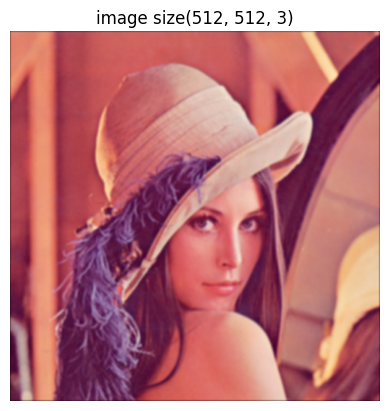

In [22]:
main()